In [29]:
import os
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import squarify
import scipy

# Connect to the database

In [3]:
# connect to SQL database
conn = psycopg2.connect(
    "host=localhost dbname=bugzilla user=postgres password=123456"
)
# Setup cursor
cursor = conn.cursor()

# Task 2: Descriptive Analysis

## Task 2-1 Bug Analysis

### 1) Total number of bugs at product level

Text(0, 0.5, 'Number of bugs (log10 scale)')

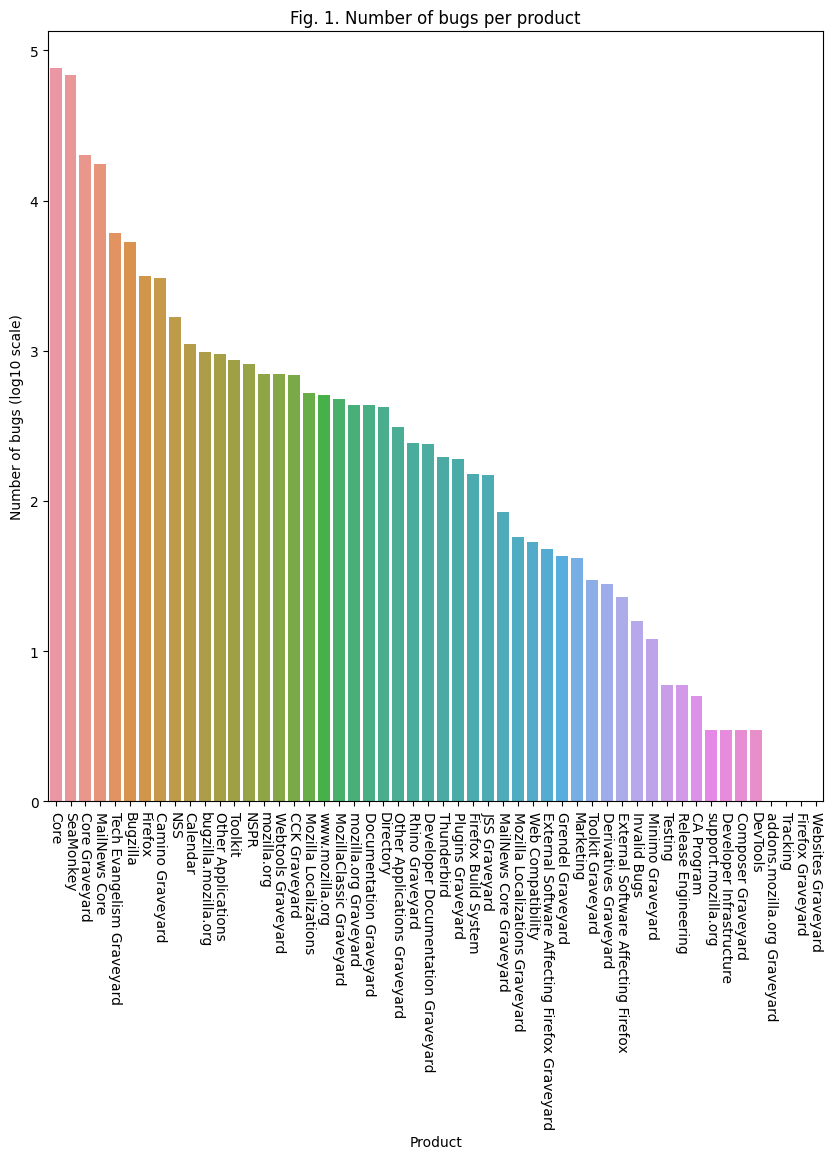

In [4]:
sql_command = """
SELECT product, COUNT(*) AS bug_count 
FROM reports 
GROUP BY product 
ORDER BY bug_count DESC;
"""
cursor.execute(sql_command)
data = cursor.fetchall()
df = pd.DataFrame(data, columns=['product', 'bug_count'])

# visualize data
fig = plt.figure(figsize=(10, 10))
sns.set_palette("pastel")
plot = sns.barplot(x=df['product'], y=np.log10(df['bug_count']))
_ = plot.set_xticklabels(plot.get_xticklabels(), rotation=-90) # rotate x-axis labels by 90 degrees
plt.title('Fig. 1. Number of bugs per product')
plt.xlabel('Product')
plt.ylabel('Number of bugs (log10 scale)')

### 2) Distribution of bugs by severity per product

<Figure size 1000x1000 with 0 Axes>

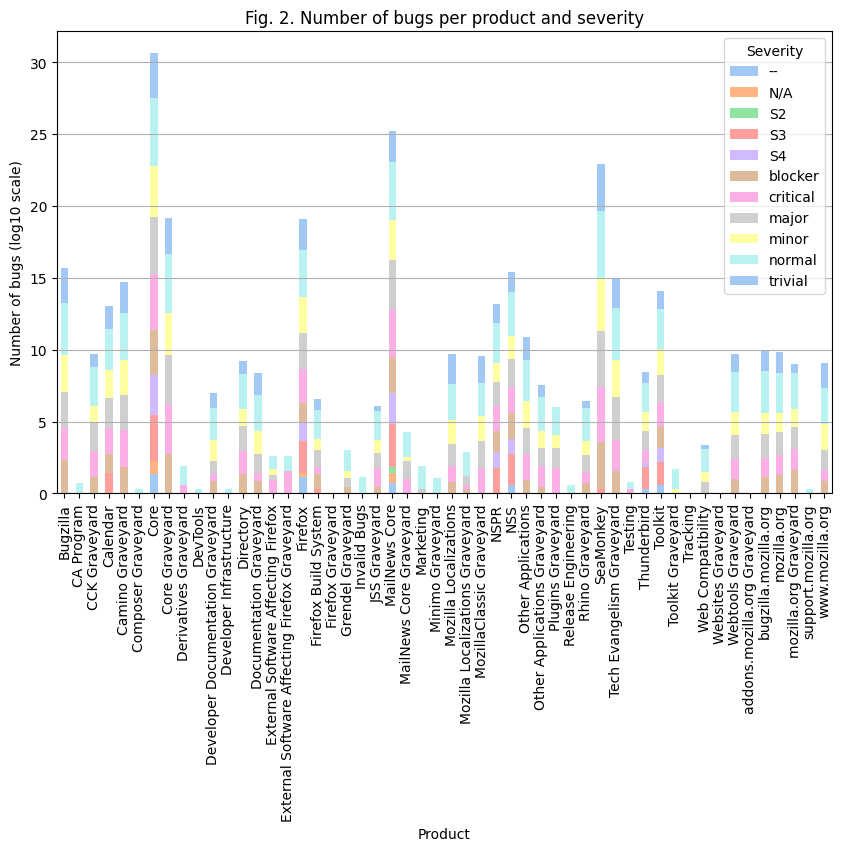

In [5]:

sql_command = """
SELECT product, severity, COUNT(*) AS bug_count, LOG10(COUNT(*)) AS log_bug_count,
       (COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (PARTITION BY product)) AS percentage
FROM reports
GROUP BY product, severity
ORDER BY bug_count DESC;
"""
cursor.execute(sql_command)
data = cursor.fetchall()
df = pd.DataFrame(data, columns=['product', 'severity', 'bug_count', 'log_bug_count', 'percentage'])

# TODO visualize data
fig = plt.figure(figsize=(10, 10))
sns.set_palette("pastel")
df.pivot_table(index='product', columns='severity', values='log_bug_count', aggfunc='sum').plot(kind='bar', stacked=True, figsize=(10, 6))
plt.gca().yaxis.grid(True)

# label the plot
plt.title('Fig. 2. Number of bugs per product and severity')
plt.xlabel('Product')
plt.ylabel('Number of bugs (log10 scale)')
plt.legend(title='Severity', loc='upper right')

<Figure size 1000x1000 with 0 Axes>

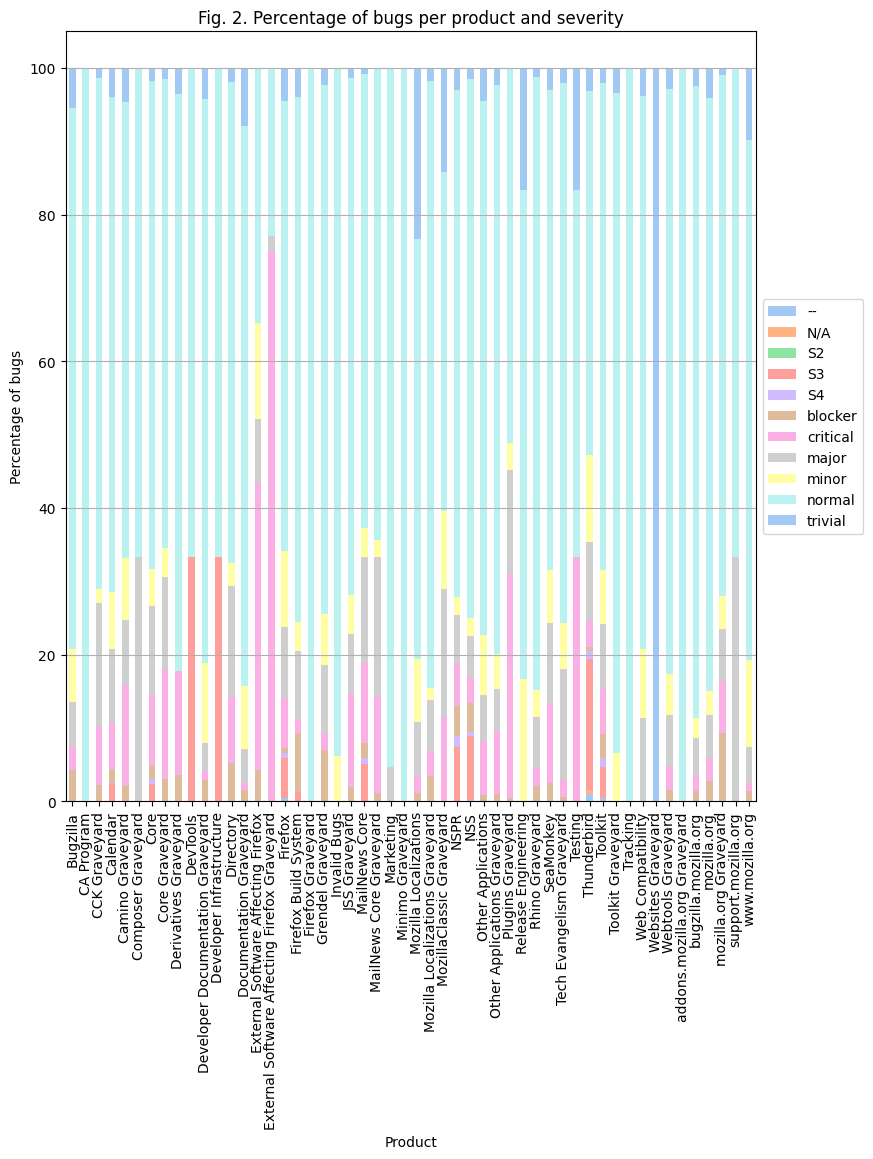

In [6]:
# draw a stacked bar chart with the percentage of bugs per product, with severity being the stacked variable
df['percentage'] = df['percentage'].astype(float)
plt.figure(figsize=(10, 10))
sns.set_palette("pastel")
ax = df.pivot_table(index='product', columns='severity', values='percentage', aggfunc='sum').replace(np.nan, 0).plot(kind='bar', stacked=True, figsize=(12, 10))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.gca().yaxis.grid(True)

# label the plot
plt.title('Fig. 2. Percentage of bugs per product and severity')
plt.xlabel('Product')
plt.ylabel('Percentage of bugs')
# legend outside the plot
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(right=0.7)  # Adjust the right margin to make space for the legend



### 3) Distribution of bugs by priority per product

<Figure size 2000x3000 with 0 Axes>

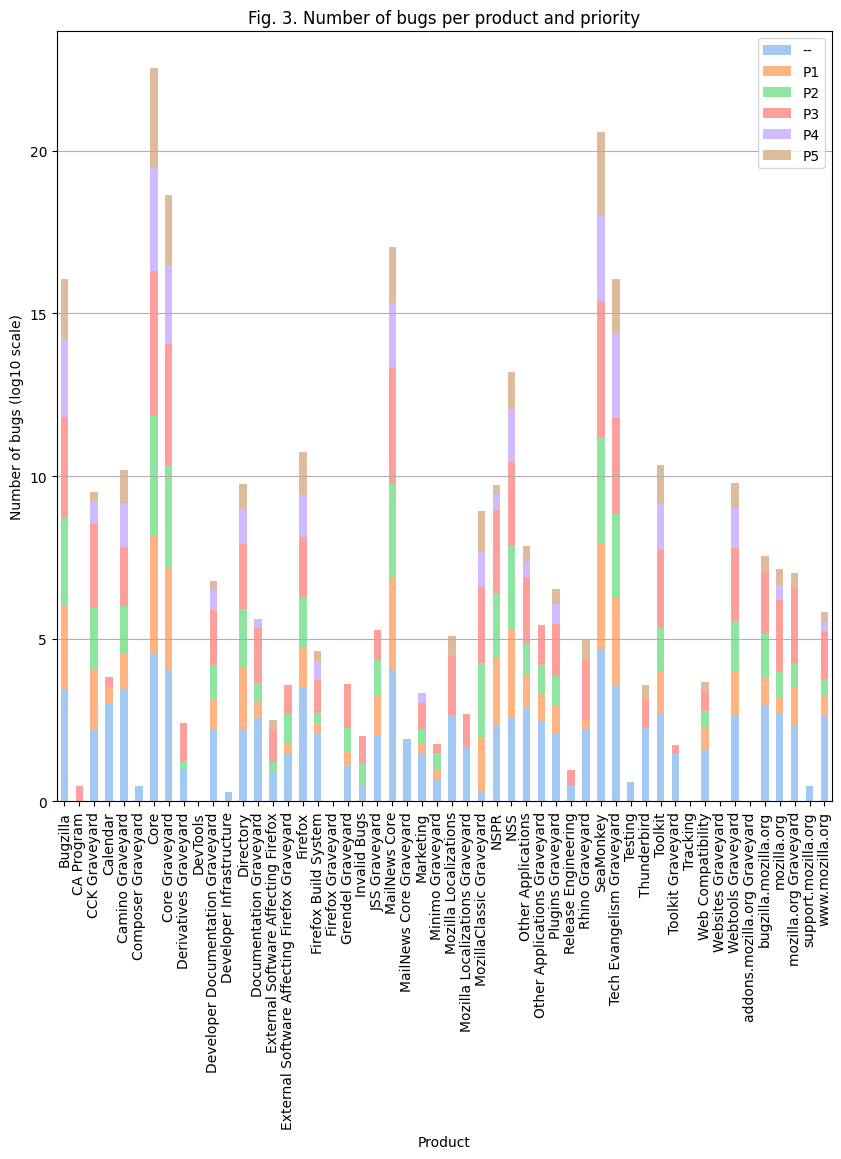

In [7]:
sql_command = """
SELECT product, priority, COUNT(*) AS bug_count, LOG10(COUNT(*)) AS log_bug_count,
       (COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (PARTITION BY product)) AS percentage
FROM reports
GROUP BY product, priority
ORDER BY bug_count DESC;
"""
cursor.execute(sql_command)
data = cursor.fetchall()
df = pd.DataFrame(data, columns=['product', 'priority', 'bug_count', 'log_bug_count', 'percentage'])

# TODO visualize data
fig = plt.figure(figsize=(20, 30))
sns.set_palette("pastel")
df.pivot_table(index='product', columns='priority', values='log_bug_count', aggfunc='sum').plot(kind='bar', stacked=True, figsize=(10, 10))
plt.gca().yaxis.grid(True)

# label the plot
plt.title('Fig. 3. Number of bugs per product and priority')
plt.xlabel('Product')
plt.ylabel('Number of bugs (log10 scale)')
plt.legend(loc='upper right')


Text(0, 0.5, 'Percentage of bugs')

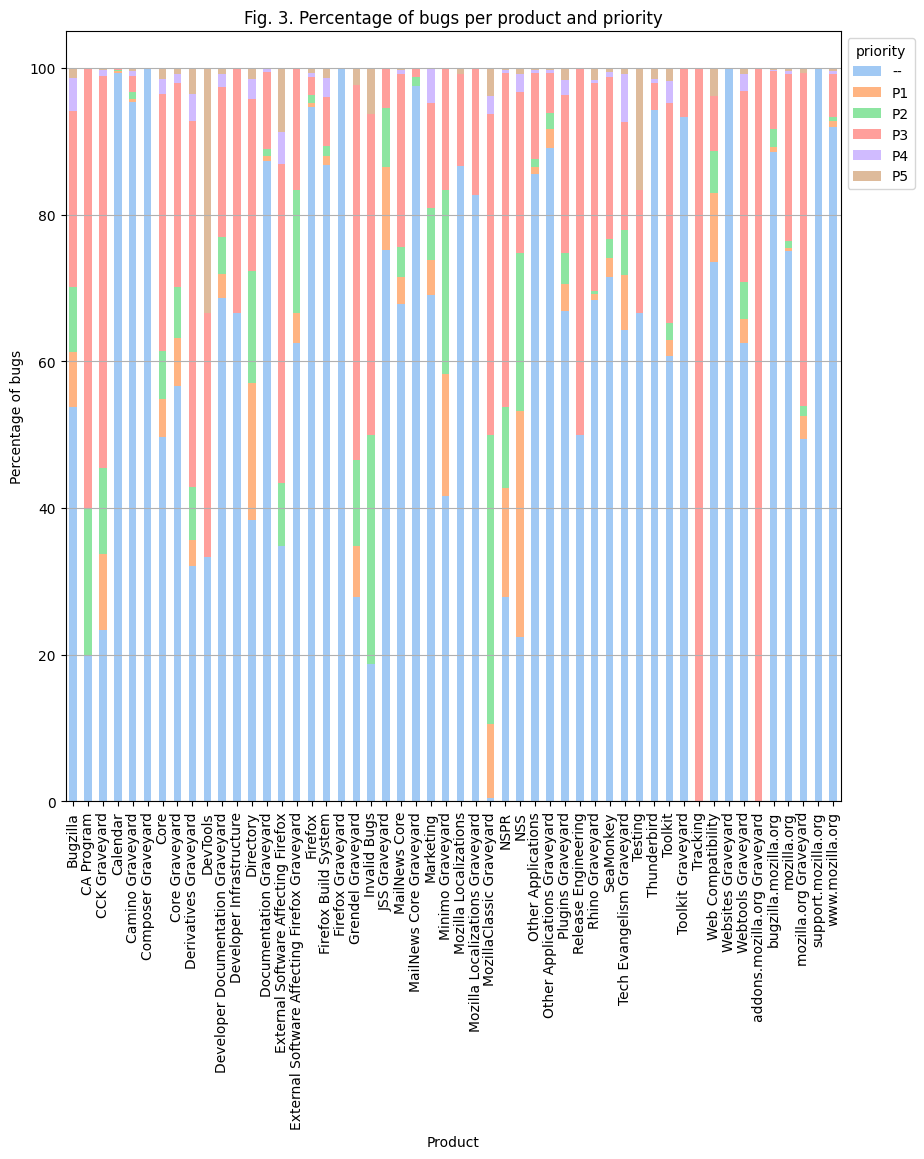

In [8]:
# draw a stacked bar chart with the percentage of bugs per product, with priority being the stacked variable
df['percentage'] = df['percentage'].astype(float)
sns.set_palette("pastel")
ax = df.pivot_table(index='product', columns='priority', values='percentage', aggfunc='sum').replace(np.nan, 0).plot(kind='bar', stacked=True, figsize=(10, 10))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.grid()
# only draw horizontal grid lines
plt.gca().yaxis.grid(True)

# label the plot
plt.title('Fig. 3. Percentage of bugs per product and priority')
plt.xlabel('Product')
plt.ylabel('Percentage of bugs')


### 4) Distribution of bugs by status per product

Text(0.5, 1.0, 'Fig. 4. Percentage of bugs per product and status')

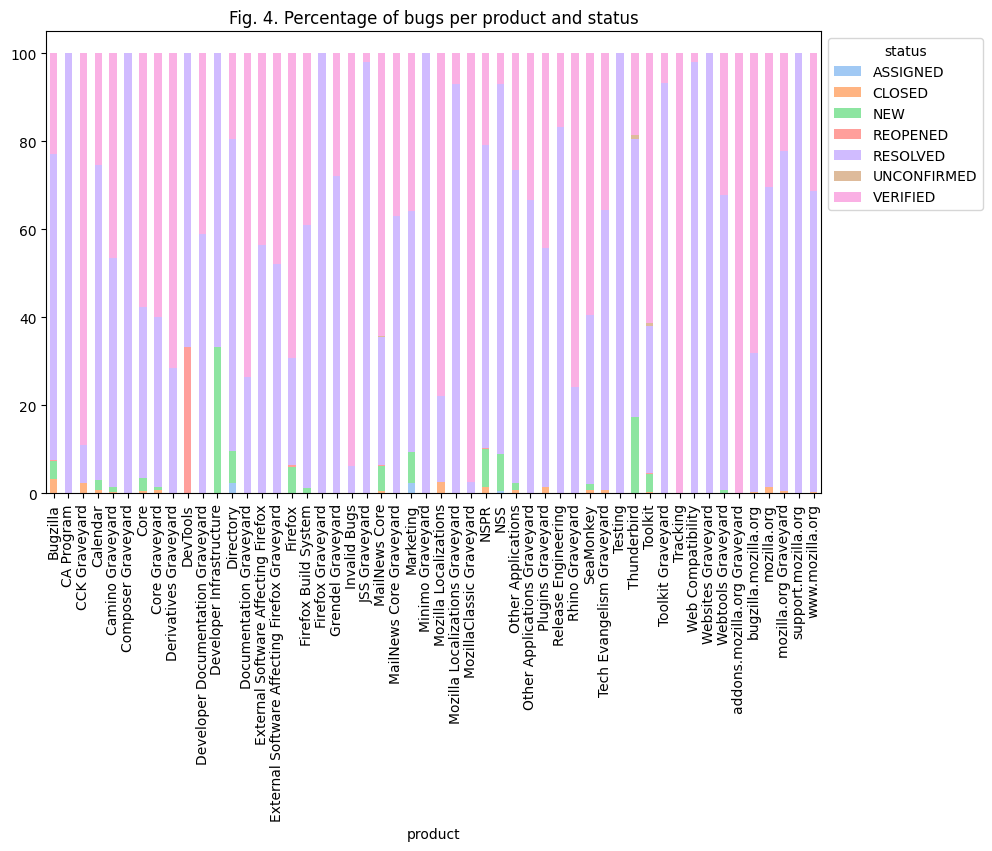

In [9]:
sql_command = """
SELECT product, status, COUNT(*) AS bug_count, LOG10(COUNT(*)) AS log_bug_count,
       (COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (PARTITION BY product)) AS percentage
FROM reports
GROUP BY product, status;
"""
cursor.execute(sql_command)
data = cursor.fetchall()
df = pd.DataFrame(data, columns=['product', 'status', 'bug_count', 'log_bug_count',  'percentage'])

df['percentage'] = df['percentage'].astype(float)
sns.set_palette("pastel")
ax = df.pivot_table(index='product', columns='status', values='percentage', aggfunc='sum').replace(np.nan, 0).plot(kind='bar', stacked=True, figsize=(10, 6))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Fig. 4. Percentage of bugs per product and status')

### 5) Distribution of bugs by resolution per product

Text(0, 0.5, 'Percentage of bugs')

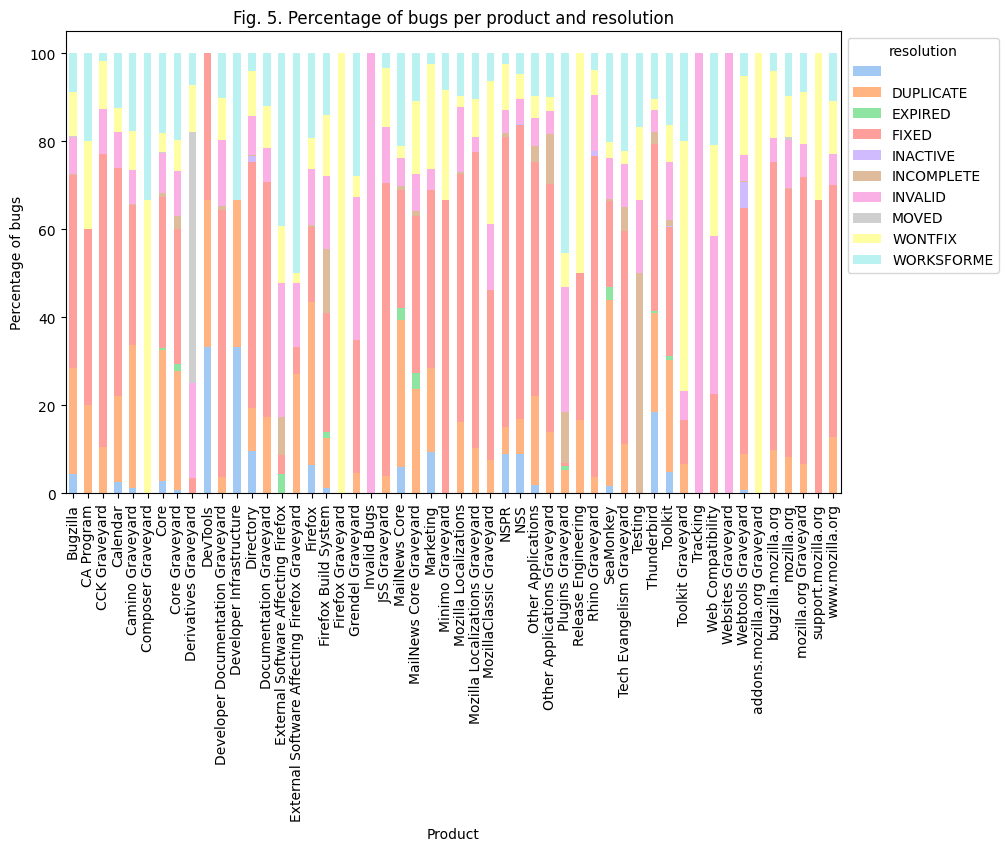

In [10]:
sql_command = """
SELECT product, resolution, COUNT(*) AS bug_count, LOG10(COUNT(*)) AS log_bug_count,
       (COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (PARTITION BY product)) AS percentage
FROM reports
GROUP BY product, resolution;
"""
cursor.execute(sql_command)
data = cursor.fetchall()
df = pd.DataFrame(data, columns=['product', 'resolution', 'bug_count', 'log_bug_count',  'percentage'])

df['percentage'] = df['percentage'].astype(float)
sns.set_palette("pastel")
ax = df.pivot_table(index='product', columns='resolution', values='percentage', aggfunc='sum').replace(np.nan, 0).plot(kind='bar', stacked=True, figsize=(10, 6))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# label the plot
plt.title('Fig. 5. Percentage of bugs per product and resolution')
plt.xlabel('Product')
plt.ylabel('Percentage of bugs')


## Task 2-2 User Analysis

### 1) Proportion of user roles & Proportion of bugs connected to those roles

In [11]:
#### SQL query: Proportion of user roles and bugs that connected to those roles
# There are only 15 mentors in total so the mentors_id is excluded from the roles
key_usertype = ["assigned_to_id", "qa_contact_id", "cc_id"]
# Load data into dataframe list
# Build up a list
l_df_2 = []
# Iterate assigned_to_id and qa_contact_id which are many-to-1 relationships
for i in key_usertype[:2]:
    query_1 = f"""
    SELECT
    round((SELECT COUNT(DISTINCT {i})::decimal FROM reports)
    /
    (SELECT COUNT(id)::decimal FROM users), 3)
    AS per_user,
    round((SELECT COUNT(bug_id)::decimal from reports where {i} is not null)
    /
    (SELECT COUNT(bug_id)::decimal FROM reports), 3)
    AS per_bug
    """
    df_temp_1 = pd.read_sql_query(query_1, conn)
    l_df_2.append(df_temp_1)

# cc_id and mentors_id have many-to-many match to user id and are stored in an array
i = key_usertype[2]
query_2 = f"""
SELECT
round((SELECT COUNT(DISTINCT unset_id)::decimal FROM (SELECT unnest({i}) AS unset_id FROM reports) AS dis_id)
/
(SELECT COUNT(id)::decimal FROM users), 3)
AS per_user,
round((select COUNT(bug_id)::decimal from reports where array_length({i}, 1) is not null)
/
(SELECT COUNT(bug_id)::decimal FROM reports), 3)
AS per_bug
"""
df_temp_2 = pd.read_sql_query(query_2, conn)
l_df_2.append(df_temp_2)

C:\Users\xiaoc\AppData\Local\Temp\ipykernel_27336\2294129896.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_temp_1 = pd.read_sql_query(query_1, conn)
C:\Users\xiaoc\AppData\Local\Temp\ipykernel_27336\2294129896.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_temp_2 = pd.read_sql_query(query_2, conn)


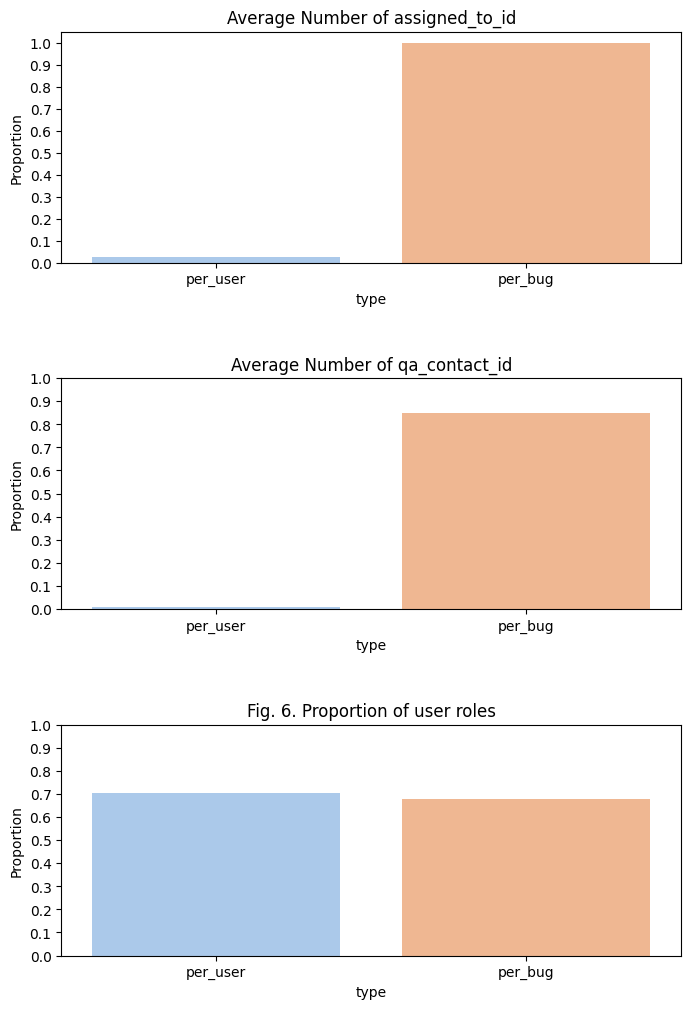

In [12]:
#### Create subplots
fig, axes = plt.subplots(3, 1, figsize = (8, 12))
axes = axes.ravel()

# Create bar chart
for i in np.arange(len(l_df_2)):
    df_temp = l_df_2[i]
    #axes[i].bar(0.3, df_temp["per_user"], 0.2, label="a_user_is", color='orange')
    #axes[i].bar(0.7, df_temp["per_bug"], 0.2, label="a_bug_has", color='blue')
    # Convert to long format
    df_temp = df_temp.melt(var_name="type", value_name="proportion")
    sns.barplot(x="type", y="proportion", data=df_temp, ax=axes[i])
    axes[i].set_title(f"Average Number of {key_usertype[i]}")
    axes[i].set_ylabel(f"Proportion")
    axes[i].set_xticks([0,1])
    axes[i].set_yticks(np.arange(0.0, 1.1, 0.1))

# Show the plot
plt.title("Fig. 6. Proportion of user roles")
plt.subplots_adjust(hspace=0.5)
plt.show()

### 2) Average solvers per bug by different categories

C:\Users\xiaoc\AppData\Local\Temp\ipykernel_27336\3969389386.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_temp = pd.read_sql_query(query, conn)


Avg solver of all product Mean:  0.246 Median:  0.113 

Avg solver of all severity Mean:  0.125 Median:  0.05 

Avg solver of all priority Mean:  0.068 Median:  0.052 



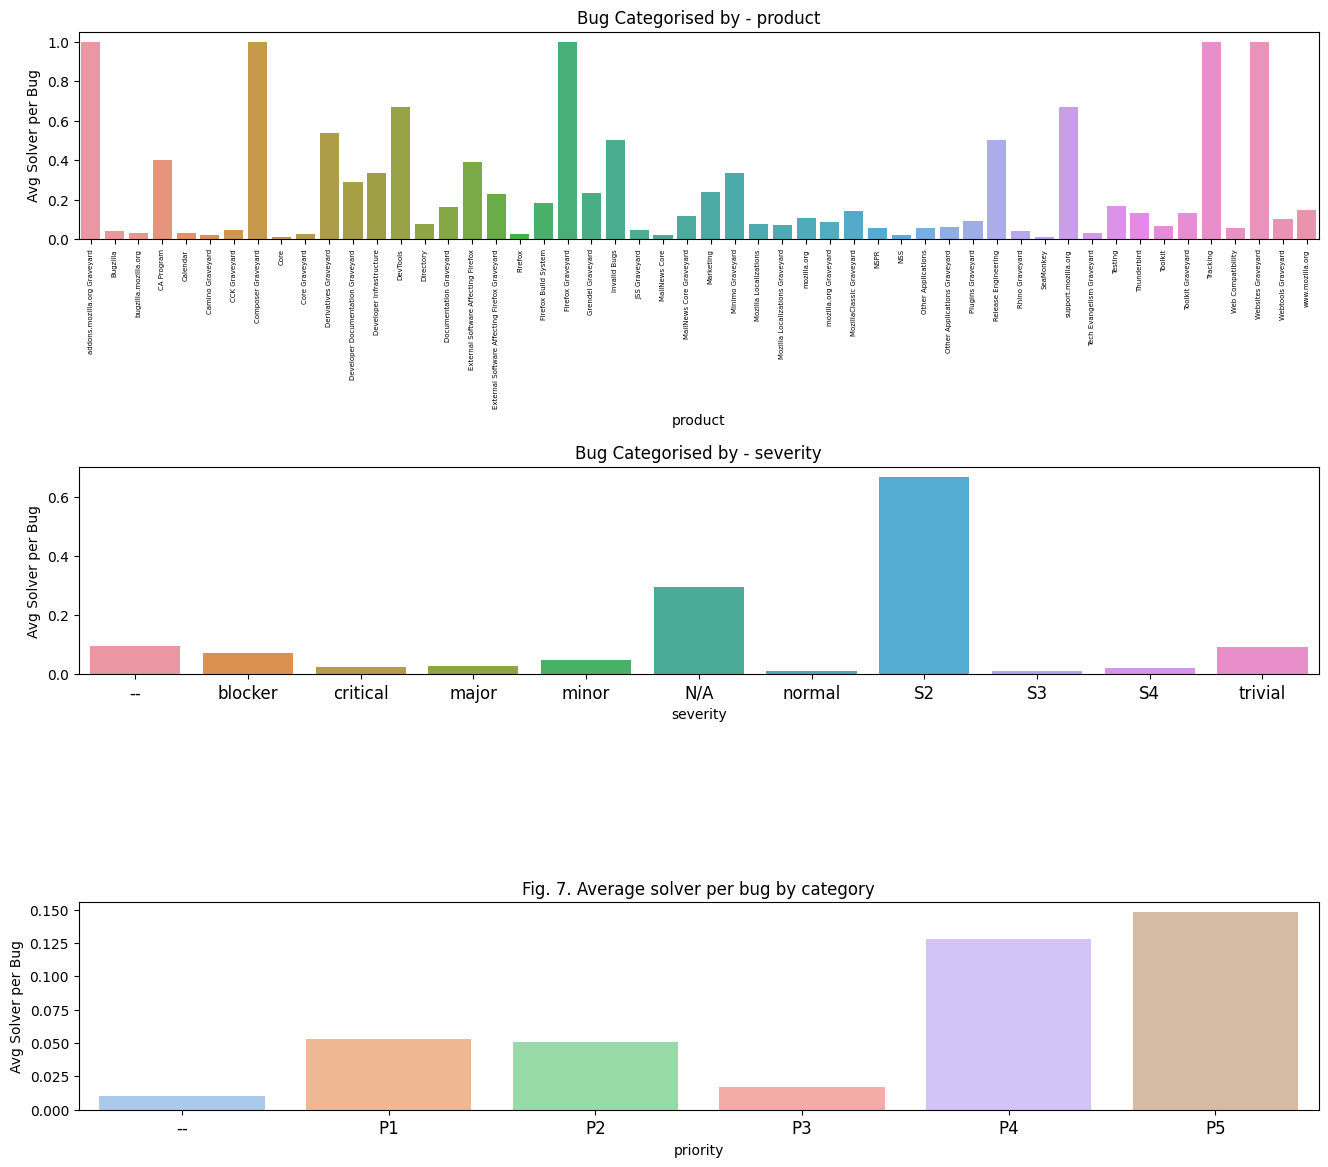

In [13]:
#### SQL query: Average solver per bug
key_solverperbug = ["product", "severity", "priority"]
# Load data into dataframe list
l_df_1 = []
for i in key_solverperbug:
    query = f"""
SELECT
{i}, ROUND(COUNT(DISTINCT assigned_to_id)::decimal
/
COUNT(bug_id)::decimal, 3)
AS solver_avg FROM reports GROUP BY {i};
"""
    df_temp = pd.read_sql_query(query, conn)
    l_df_1.append(df_temp)


#### Create subplots
fig, axes = plt.subplots(3, 1, figsize = (16, 14))
axes = axes.ravel()
# Create bar chart
for i in np.arange(len(l_df_1)):
    df_temp = l_df_1[i]
    #axes[i].bar(df_temp[key_solverperbug[i]], df_temp["solver_avg"])
    sns.barplot(x=df_temp[key_solverperbug[i]], y=df_temp["solver_avg"], ax=axes[i])

    # Print mean, meidan values
    print("Avg solver of all", f"{key_solverperbug[i]}", "Mean: ", round(np.mean(df_temp["solver_avg"]), 3),
          "Median: ", round(np.median(df_temp["solver_avg"]), 3), "\n")
    
    axes[i].set_title(f"Bug Categorised by - {key_solverperbug[i]}")
    axes[i].set_ylabel("Avg Solver per Bug")
axes[0].set_xticklabels(l_df_1[0][key_solverperbug[0]], rotation=90, fontsize=5)
axes[1].set_xticklabels(l_df_1[1][key_solverperbug[1]], fontsize=12)
axes[2].set_xticklabels(l_df_1[2][key_solverperbug[2]], fontsize=12)

# Show the plot
plt.title("Fig. 7. Average solver per bug by category")
plt.subplots_adjust(hspace=1.1)
plt.show()

## Task 2-3 Timeseries Analysis

### 1) Average time of resolution of bugs per severity level for each product

Text(95.7222222222222, 0.5, 'Product')

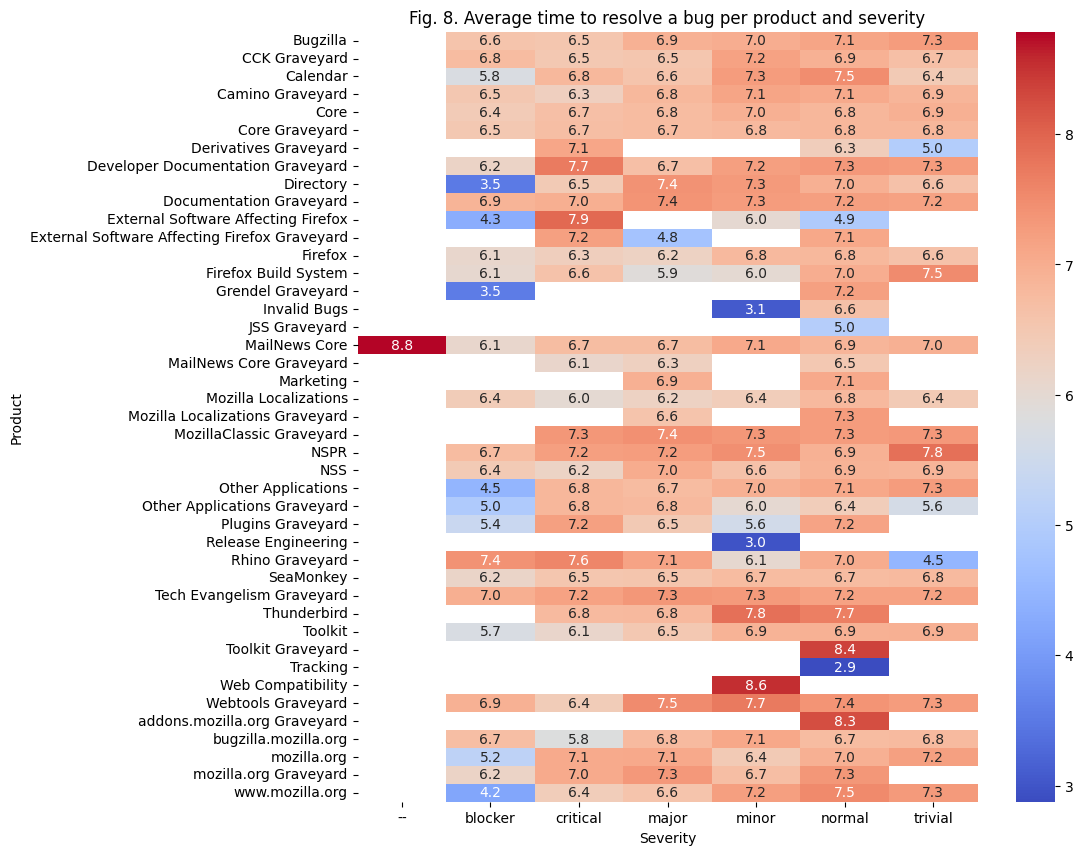

In [14]:
sql_command = """
SELECT r.product, r.severity, 
LOG10(AVG(EXTRACT (epoch FROM(TO_TIMESTAMP(c.value, 'YYYY-MM-DD HH24:MI:SS' ) - r.creation_time)))) AS log_avg_time_sec
FROM reports r
JOIN custom_fields c on r.bug_id = c.bug_id
WHERE r.status in ('VERIFIED','CLOSED') AND c.cf_field_name = 'cf_last_resolved'
GROUP BY r.product, r.severity
ORDER BY r.product, log_avg_time_sec DESC;
"""
cursor.execute(sql_command)
data = cursor.fetchall()
df = pd.DataFrame(data, columns=['product', 'severity', 'log_avg_time_sec'])
df['log_avg_time_sec'] = df['log_avg_time_sec'].astype(float)

# pivot the data to create a matrix of average time per product and severity
df_pivot = df.pivot_table(index='product', columns='severity', values='log_avg_time_sec', aggfunc='sum')

# create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df_pivot, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Fig. 8. Average time to resolve a bug per product and severity')
plt.xlabel('Severity')
plt.ylabel('Product')

### 2) Priority and average resolution time

In [15]:
sql_command="""
SELECT r.product, r.priority, 
AVG(EXTRACT(epoch FROM(TO_TIMESTAMP(cf.value, 'YYYY-MM-DD HH24:MI:SS' ) -r.creation_time)) / 3600) AS avg_res_time_hr
FROM reports r
JOIN custom_fields cf ON r.bug_id=cf.bug_id
WHERE r.status in ('VERIFIED','CLOSED') AND cf.cf_field_name = 'cf_last_resolved'
GROUP BY r.product, r.priority 
ORDER BY r.product, r.priority, avg_res_time_hr DESC;
"""
cursor.execute(sql_command)
data = cursor.fetchall()
df = pd.DataFrame(data, columns=['product', 'priority', 'avg_res_time_hr'])


# convert priority to numeric
df['priority_num'] = df['priority'].map({'P1': 1, 'P2': 2, 'P3': 3, 'P4': 4, 'P5': 5, 'P6' :'--', 'P7' :'N/A'})
df.head()

# convert avg_res_time_hr to float
df['avg_res_time_hr'] = df['avg_res_time_hr'].astype('float')
# convert priority_num to float
df['priority_num'] = df['priority_num'].astype('float')

# Encode the 'product' column numerically
df['product_code'] = pd.Categorical(df['product']).codes
df.info()

# pivot the data to create a table of average resolution time per product and priority
df_pivot = df.pivot_table(index='product', columns='priority', values='avg_res_time_hr', aggfunc='sum')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product          177 non-null    object 
 1   priority         177 non-null    object 
 2   avg_res_time_hr  177 non-null    float64
 3   priority_num     137 non-null    float64
 4   product_code     177 non-null    int8   
dtypes: float64(2), int8(1), object(2)
memory usage: 5.8+ KB


Text(95.7222222222222, 0.5, 'Product')

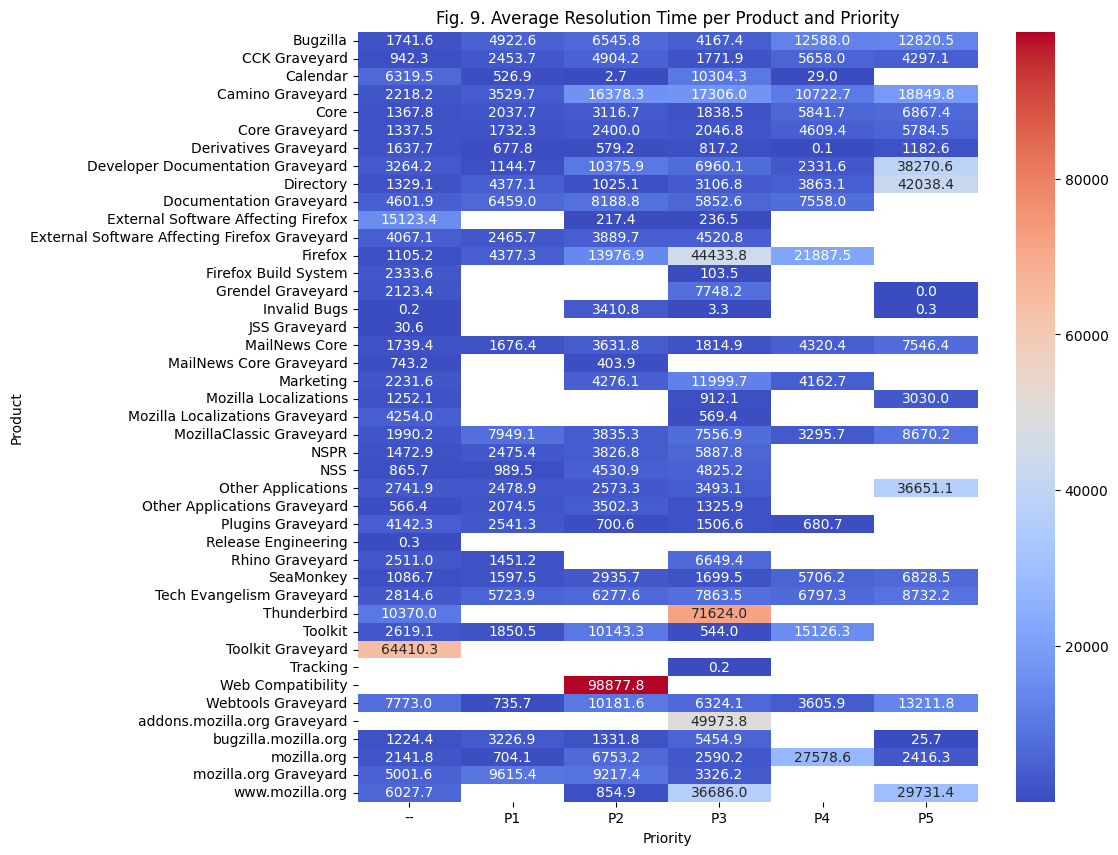

In [16]:
# Heatmap of average resolution time per product and priority
plt.figure(figsize=(10, 10))
sns.heatmap(df_pivot, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Fig. 9. Average Resolution Time per Product and Priority')
plt.xlabel('Priority')
plt.ylabel('Product')

### 3) Time Series Analysis across different status changes (intervals)

In [17]:
#### SQL query: Average time between status stages
# Load data into dataframe list
# Get necessary information from changes_hisory
query_3 = """
SELECT bug_id, added, removed, "when",
RANK() OVER (PARTITION BY bug_id ORDER BY "when" ASC) as rank,
AGE("when"::date, LAG("when"::date) OVER (PARTITION BY bug_id ORDER BY "when" ASC)) as days
FROM changes_history
WHERE field_name = 'status'
"""
df_time_1 = pd.read_sql_query(query_3, conn)

#### The time from when bug was created to the first status changed is unknown
#### Use the earliest creation date - creation_time to calculate the time from bug was created

query_4 = f"""
SELECT bug_id, creation_time FROM reports
"""
df_time_2 = pd.read_sql_query(query_4, conn)

C:\Users\xiaoc\AppData\Local\Temp\ipykernel_27336\4187848613.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_time_1 = pd.read_sql_query(query_3, conn)
C:\Users\xiaoc\AppData\Local\Temp\ipykernel_27336\4187848613.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_time_2 = pd.read_sql_query(query_4, conn)


In [18]:
#### Calculate the time from when bug was created and store each bug's stages time
# Create a dictionary to store time of different stages
dic_status = {}
for index, row in df_time_1.iterrows():
    # If it's the first change record (which doesn't have creation date)
    if row["rank"] == 1:
        # Search the creation date with the same bug_id
        crea_date = df_time_2.loc[df_time_2["bug_id"] == row["bug_id"], "creation_time"]
        interval = (row["when"] - crea_date.squeeze()).days
    else:
        interval = row["days"].days
    # Check if the status change is already included in the dictionary
    # If not, create a list as the value to store intervals
    key_status = f"{row['removed']}_{row['added']}"
    if key_status not in dic_status:
        list_days = []
        dic_status[key_status] = list_days
    # Append interval to the status change
    dic_status[key_status].append(interval)
# Clean the keys
dic_status = {k: v for k, v in dic_status.items() if not (k.startswith("_") or k.endswith("_"))}
print(dic_status.keys())

dict_keys(['NEW_RESOLVED', 'RESOLVED_VERIFIED', 'NEW_ASSIGNED', 'ASSIGNED_RESOLVED', 'VERIFIED_RESOLVED', 'VERIFIED_REOPENED', 'REOPENED_RESOLVED', 'ASSIGNED_NEW', 'RESOLVED_REOPENED', 'REOPENED_NEW', 'CLOSED_REOPENED', 'RESOLVED_CLOSED', 'CLOSED_RESOLVED', 'REOPENED_ASSIGNED', 'VERIFIED_NEW', 'RESOLVED_NEW', 'VERIFIED_CLOSED', 'NEW_UNCONFIRMED', 'UNCONFIRMED_NEW', 'CLOSED_VERIFIED', 'RESOLVED_ASSIGNED', 'CLOSED_NEW', 'REOPENED_CLOSED', 'UNCONFIRMED_RESOLVED', 'REOPENED_VERIFIED', 'RESOLVED_UNCONFIRMED', 'REOPENED_UNCONFIRMED', 'VERIFIED_ASSIGNED', 'VERIFIED_UNCONFIRMED', 'UNCONFIRMED_ASSIGNED', 'CLOSED_UNCONFIRMED', 'ASSIGNED_UNCONFIRMED', 'UNCONFIRMED_CLOSED', 'NEW_VERIFIED', 'NEW_REOPENED'])


In [19]:
#### Count the number of records of each status change
#### Calculate the average days and variance of each interval
key_status = ["count", "avg_span", "var_span"]
# Create a list to store dataframes that contains information to be visualised
l_df_3 = []
for i in key_status:
    dic_temp = {}
    if i == "count":
        for j in dic_status:
            dic_temp[j] = len(dic_status[j])
    elif i == "avg_span":
        for j in dic_status:
            dic_temp[j] = np.mean(dic_status[j])
    elif i == "var_span":
        for j in dic_status:
            dic_temp[j] = np.var(dic_status[j])
    df_temp = pd.DataFrame(dic_temp, index=[0]).transpose()
    df_temp = df_temp.reset_index()
    df_temp.columns = ["Interval", f"{i}"]
    l_df_3.append(df_temp)

count Mean:  19801.628571428573 Median:  870.0 

avg_span Mean:  451.3149270851304 Median:  70.45427608051497 

var_span Mean:  682404.8535765158 Median:  59148.8023883402 



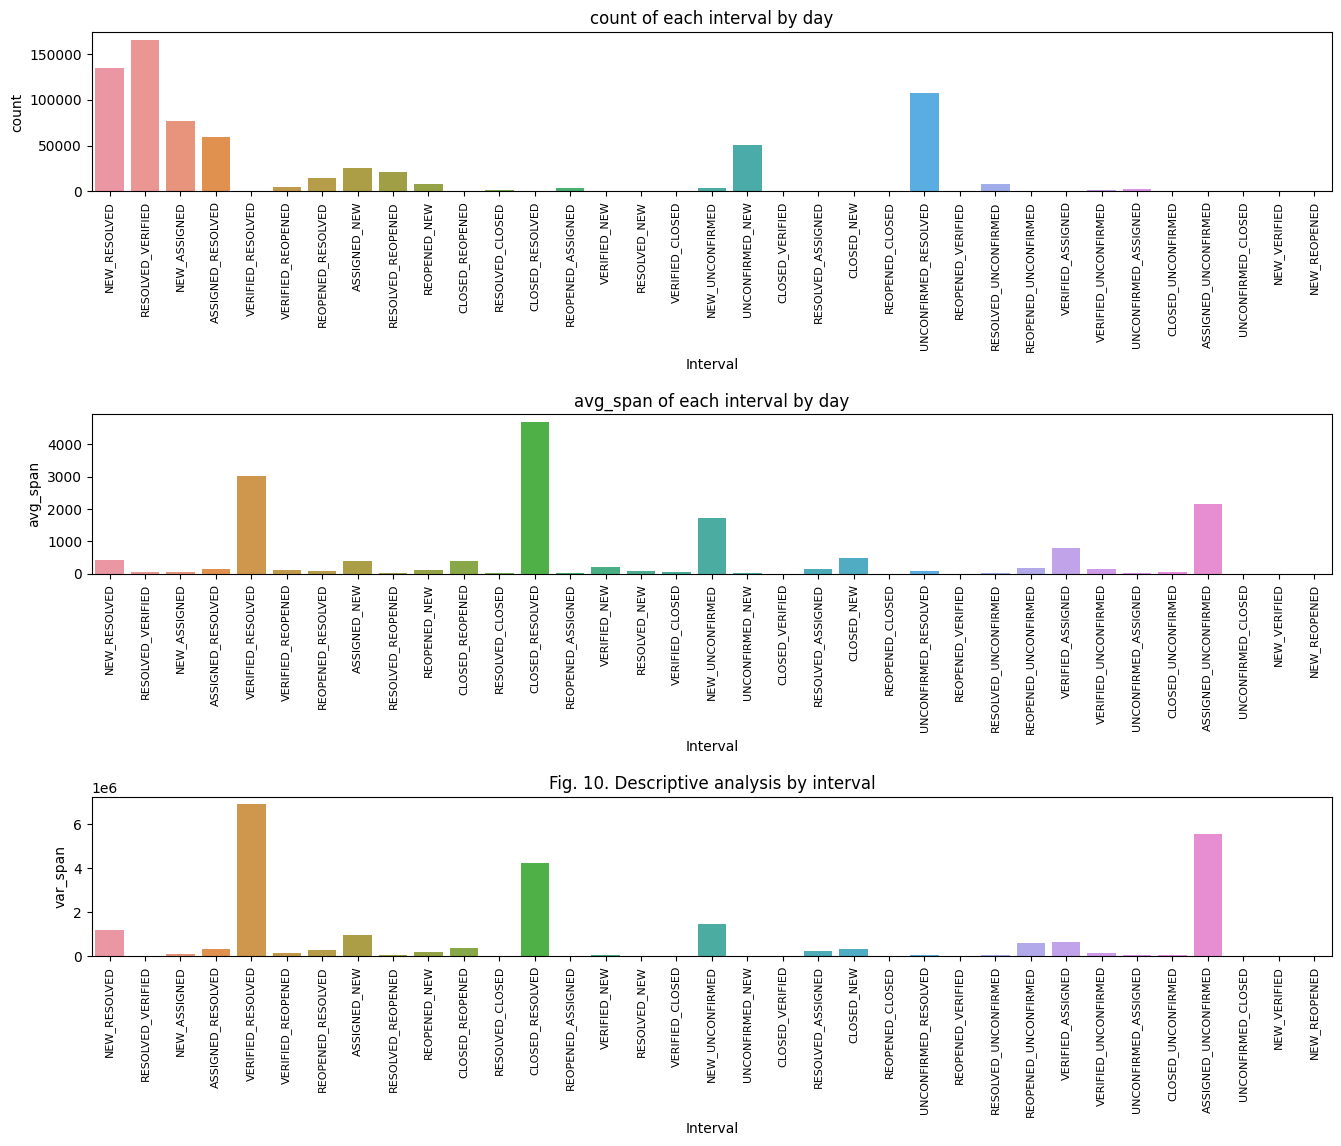

In [20]:
#### Create subplots
fig, axes = plt.subplots(3, 1, figsize = (16, 12))
axes = axes.ravel()

# Create bar chart
for i in np.arange(len(l_df_3)):
    df_temp = l_df_3[i]
    #axes[i].bar(df_temp["Status_change"], df_temp[key_status[i]])
    sns.barplot(x=df_temp["Interval"], y=df_temp[key_status[i]], ax=axes[i])

    # Print mean, meidan values
    print(f"{key_status[i]}", "Mean: ", np.mean(df_temp[key_status[i]]),
          "Median: ", np.median(df_temp[key_status[i]]), "\n")
    
    axes[i].set_title(f"{key_status[i]} of each interval by day")
    axes[i].set_ylabel(f"{key_status[i]}")
    axes[i].set_xticklabels(df_temp["Interval"], rotation=90, fontsize=8)

# Show the plot
plt.title("Fig. 10. Descriptive analysis by interval")
plt.subplots_adjust(hspace=1.4)
plt.show()

## Task 2-4 Dependency Analysis

### 1) For every bug, count how many bugs depend on this bug (direct dependencies)

   percentile
0         2.0


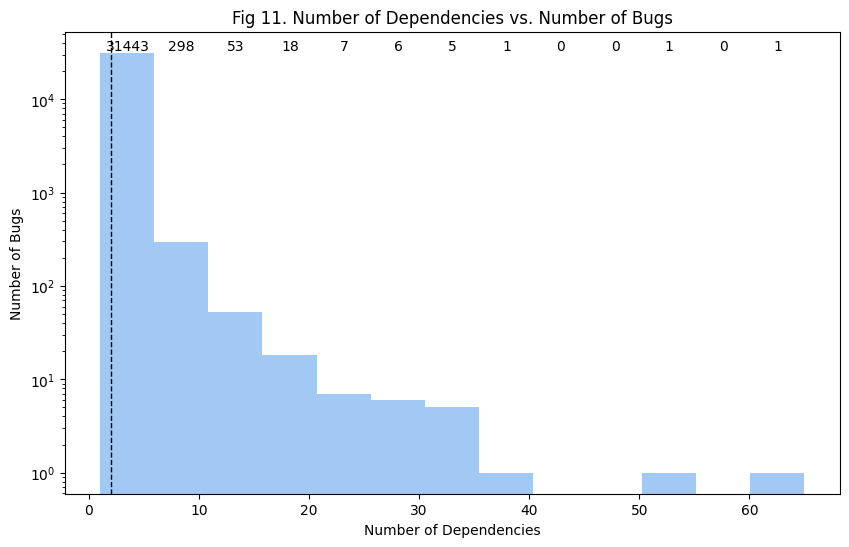

In [21]:
sql_command = """
SELECT unnest(depends_on) AS depends_bugs, COUNT(*) AS depends_count
FROM reports
GROUP BY depends_bugs
ORDER BY depends_count DESC;
"""
cursor.execute(sql_command)
data = cursor.fetchall()
df = pd.DataFrame(data, columns=['depends_bugs', 'depends_count'])
plt.figure(figsize=(10, 6))
counts, bins,_=plt.hist(df['depends_count'], bins=13, log=True)

# Add labels
plt.xlabel('Number of Dependencies')
plt.ylabel('Number of Bugs')
plt.title('Fig 11. Number of Dependencies vs. Number of Bugs')


# Add count values above each bar
for c, bin_value in zip(counts, bins):
    plt.text(bin_value+2.5,31000, str(int(c)), ha='center', va='bottom')

# compute the 90% percentile of the number of dependencies in sql

sql_command = """
SELECT PERCENTILE_CONT(0.9) WITHIN GROUP (ORDER BY depends_per_bug.depends_count) AS p90
FROM (
    SELECT unnest(reports.depends_on) AS depends_bugs, COUNT(*) AS depends_count
    FROM reports
    GROUP BY depends_bugs
) depends_per_bug;
"""

cursor.execute(sql_command)
data = cursor.fetchall()
df = pd.DataFrame(data, columns=['percentile'])
print(df)

# Draw a vertical line at the 90% percentile in the histogram
plt.axvline(df['percentile'][0], color='k', linestyle='dashed', linewidth=1)
plt.show()

### 2) For every bug, count the number of bugs it blocks (direct blocks)

     0
0  3.0


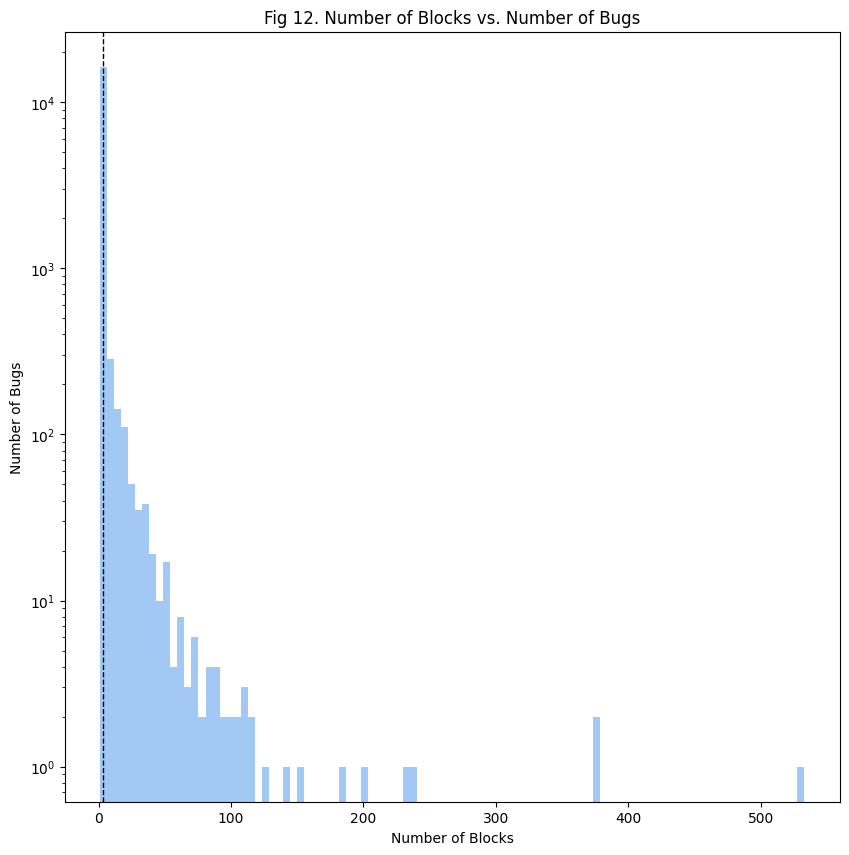

In [22]:
sql_command = """
SELECT unnest(blocks) AS blocks_bugs, COUNT(*) AS blocks_count
FROM reports
GROUP BY blocks_bugs
ORDER BY blocks_count DESC;
"""
cursor.execute(sql_command)
data = cursor.fetchall()
df = pd.DataFrame(data, columns=['blocks_bugs', 'blocks_count'])
plt.figure(figsize=(10, 10))
counts, bins,_=plt.hist(df['blocks_count'], bins=100, log=True)

# Add labels
plt.xlabel('Number of Blocks')
plt.ylabel('Number of Bugs')
plt.title('Fig 12. Number of Blocks vs. Number of Bugs')

# compute P90 of blocks_count in SQL
sql_command = """
SELECT PERCENTILE_CONT(0.9) WITHIN GROUP (ORDER BY blocks_per_bug.blocks_count) AS p90
FROM (
    SELECT unnest(blocks) AS blocks_bugs, COUNT(*) AS blocks_count
    FROM reports
    GROUP BY blocks_bugs
) blocks_per_bug;
"""
cursor.execute(sql_command)
data = cursor.fetchall()
df = pd.DataFrame(data)
print(df)

# Draw a vertical line at the 90% percentile in the histogram
plt.axvline(df[0][0], color='k', linestyle='dashed', linewidth=1)
plt.show()

## Task 2-5 Comment Analysis

### 1) Number of comments per product per bug

Text(0.5, 1.0, 'Fig. 13. Number of comments per product')

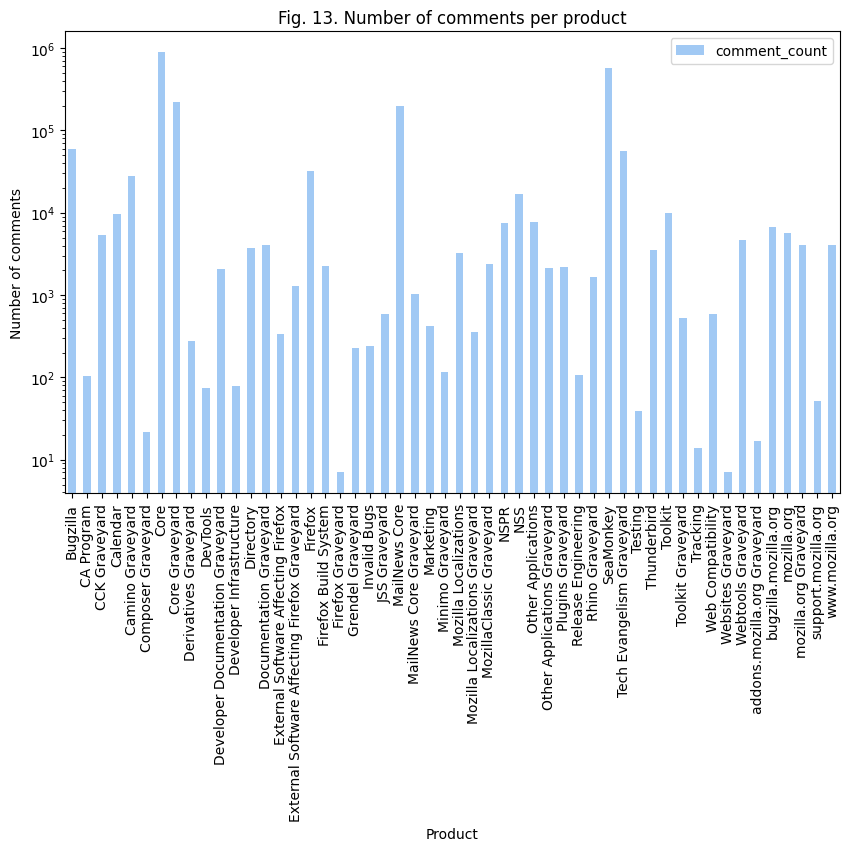

In [23]:
sql_command = """
SELECT r.product, r.bug_id, COUNT(*) AS comment_count
FROM reports r
LEFT JOIN comments c ON r.bug_id = c.bug_id
GROUP BY r.product, r.bug_id
ORDER BY r.product, comment_count DESC;
"""
cursor.execute(sql_command)
data = cursor.fetchall()
df = pd.DataFrame(data, columns=['product', 'bug_id', 'comment_count'])

# pivot the data to create a table of number of comments per product
df_pivot = df.pivot_table(index='product', values='comment_count', aggfunc='sum')

# plot the data in log scale
sns.set_palette("pastel")
df_pivot.plot(kind='bar', figsize=(10, 6), logy=True)
#label the axes
plt.xlabel('Product')
plt.ylabel('Number of comments')
plt.title('Fig. 13. Number of comments per product')

### 2) Comment vs Resolution time

In [24]:
sql_command = """
SELECT r.product, r.bug_id, r.severity, LOG10(EXTRACT (epoch FROM(TO_TIMESTAMP(cf.value, 'YYYY-MM-DD HH24:MI:SS' )-r.creation_time))) AS res_time, COUNT(c.*) AS comment_count
FROM reports r
JOIN comments c ON r.bug_id=c.bug_id
JOIN custom_fields cf ON r.bug_id=cf.bug_id
WHERE r.status in ('VERIFIED','CLOSED') AND cf.cf_field_name = 'cf_last_resolved'
GROUP BY r.product, r.severity, r.bug_id, res_time
ORDER BY r.product, r.severity, comment_count DESC;
"""

cursor.execute(sql_command) 
data = cursor.fetchall()
df = pd.DataFrame(data, columns=['product', 'bug_id', 'severity', 'res_time', 'comment_count'])
df['severity_num'] = df['severity'].map({'blocker': 1, 'critical': 2, 'major': 3, 'minor': 4, 'normal': 5, 'trivial': 6})
df['res_time'] = df['res_time'].astype('float') # convert nanoseconds to seconds

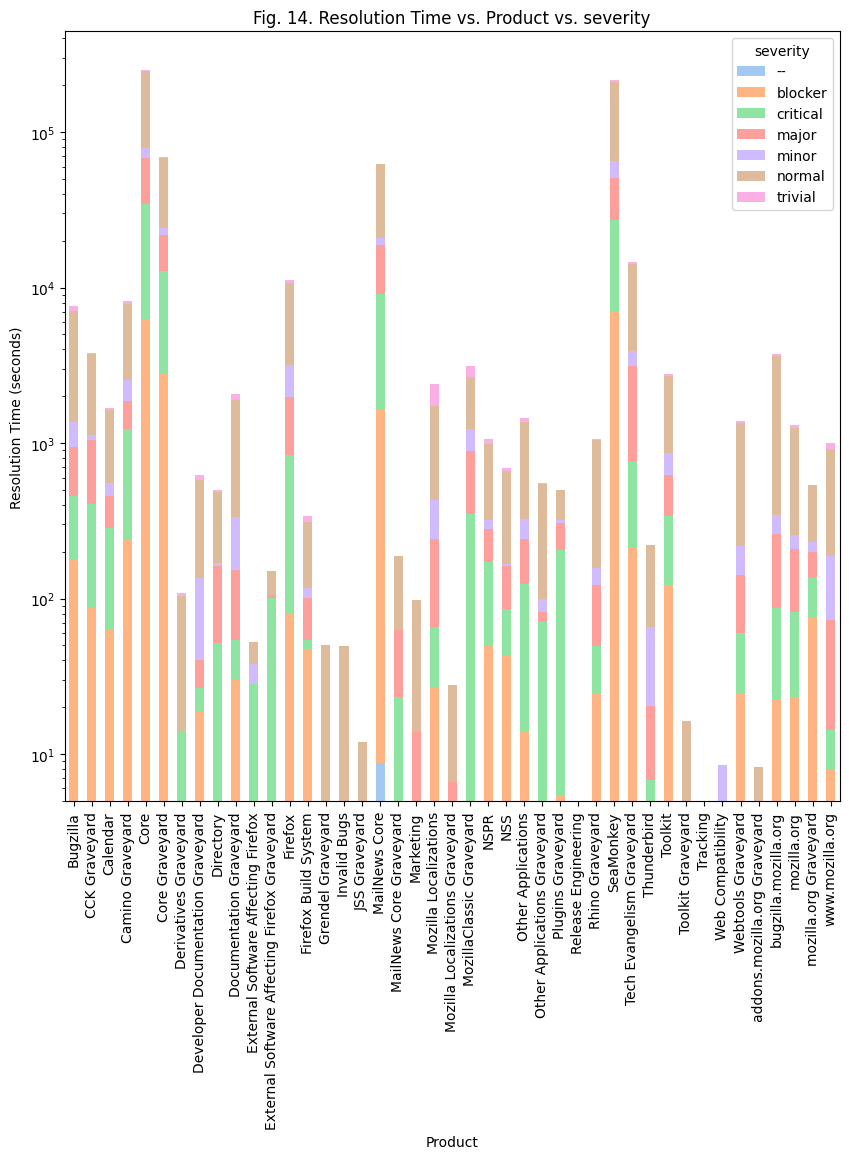

In [25]:
# pivot the data to create a table of resolution time per product and comment count 
df_pivot = df.pivot_table(index='product', columns='severity', values='res_time', aggfunc='sum')

# stacked bar plot  
sns.set_palette("pastel")
df_pivot.plot(kind='bar', figsize=(10, 10), stacked=True, logy=True)
plt.ylabel('Resolution Time (seconds)')
plt.xlabel('Product')
plt.title('Fig. 14. Resolution Time vs. Product vs. severity')
plt.show()

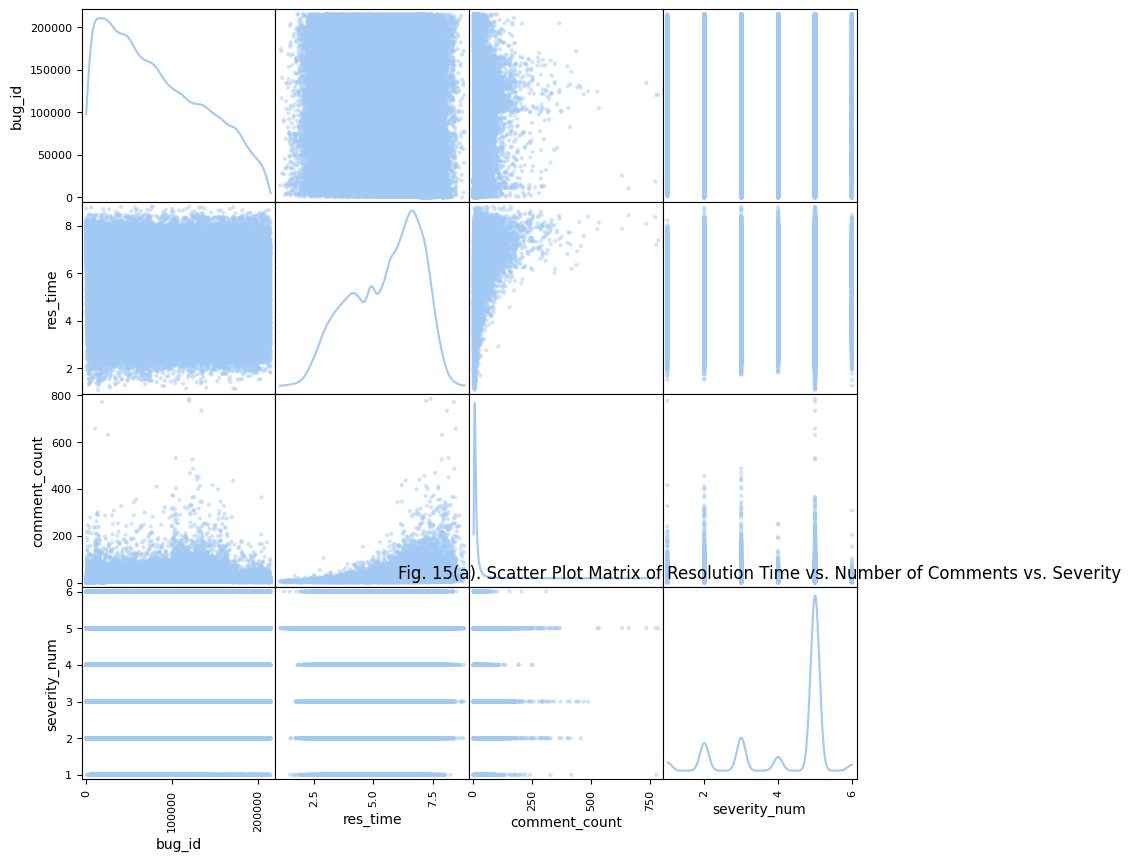

In [30]:
# Create the scatter plot matrix of all the columns in the dataframe
pd.plotting.scatter_matrix(df, figsize=(10, 10), diagonal='kde')
plt.title('Fig. 15(a). Scatter Plot Matrix of Resolution Time vs. Number of Comments vs. Severity')
plt.show()

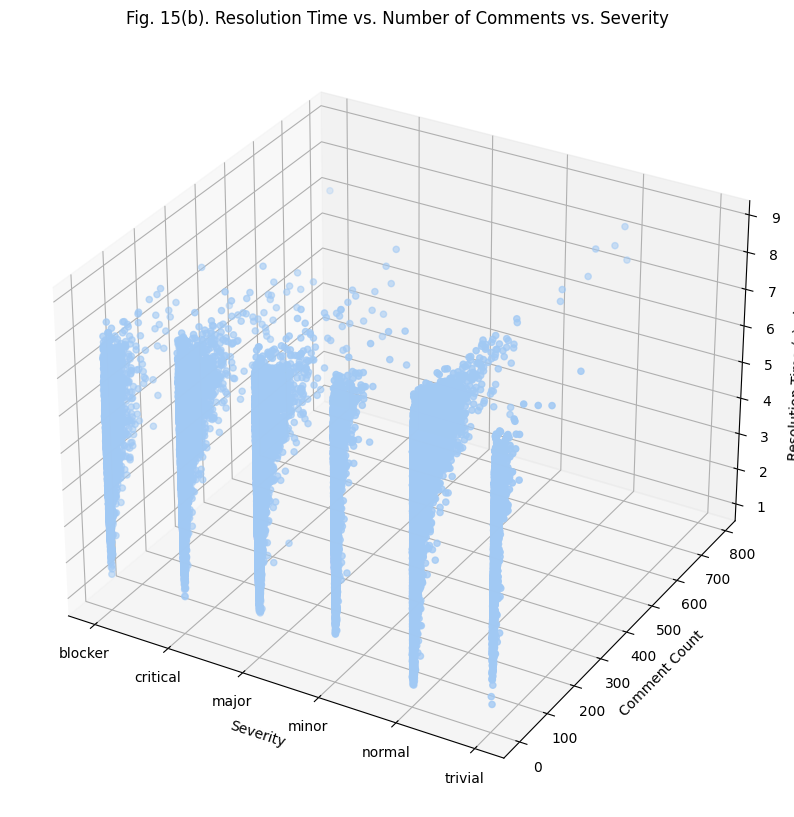

In [31]:
# 3D plot of resolution time vs. number of comments vs. severity
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['severity_num'], df['comment_count'], df['res_time'])
ax.set_xlabel('Severity')
ax.set_xticks([1, 2, 3, 4, 5, 6])
ax.set_xticklabels(['blocker', 'critical', 'major', 'minor', 'normal', 'trivial'])
ax.set_ylabel('Comment Count')
ax.set_zlabel('Resolution Time (s) - log scale')
plt.title('Fig. 15(b). Resolution Time vs. Number of Comments vs. Severity')
plt.show()

### 3) Count of comments per commenters

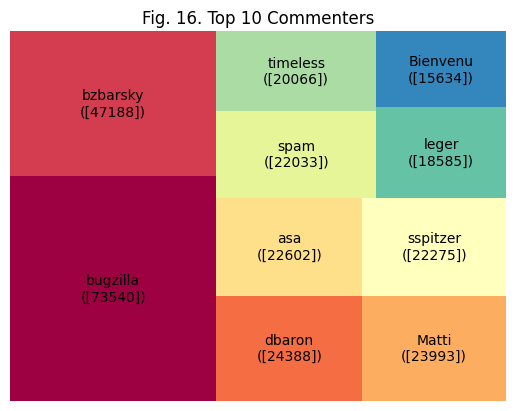

In [32]:
sql_command= """
SELECT u.nick, COUNT(*) AS comment_count 
FROM comments c
JOIN users u ON c.creator=u.email
GROUP BY u.nick
ORDER BY comment_count DESC;
"""

cursor.execute(sql_command)
data = cursor.fetchall()
df = pd.DataFrame(data, columns=['nick', 'comment_count'])
df.head()

# tree map to show the top 10 commenters
commenter_counts = df.set_index('nick').iloc[:10]
colors = [plt.cm.Spectral(i/float(len(commenter_counts))) for i in range(len(commenter_counts))]
squarify.plot(sizes=commenter_counts.values, label=[f"{label}\n({count})" for label, count in zip(commenter_counts.index, commenter_counts.values)], color=colors)
plt.axis('off')
plt.title('Fig. 16. Top 10 Commenters')
plt.show()

### 4) Compute correlation between votes and comments

In [33]:
sql_command = """
SELECT CORR(comments_per_bug.comment_count, r.votes) AS correlation
FROM (
  SELECT r.bug_id, COUNT(*) AS comment_count
  FROM reports r
  LEFT JOIN comments c ON r.bug_id = c.bug_id
  GROUP BY r.bug_id
) comments_per_bug
JOIN reports r ON comments_per_bug.bug_id = r.bug_id;
"""
cursor.execute(sql_command)
data = cursor.fetchall()
df = pd.DataFrame(data, columns=['correlation'])
df


,correlation
0,0.456489


# Close Connection

In [34]:
# Finally we are done, close the cursor and connection
cursor.close()
conn.close()